# Hemuppgift 9

In [11]:
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

### Introduktion

I denna uppgift ska du anpassa en linjär funktion till data. Läs in data från filen *pendel9.csv*.

In [12]:
data = np.genfromtxt('pendel9.csv', delimiter=',', skip_header=1, usecols = (2, 3, 4, 5))

Först skapar vi våra variabler $l$ och $T$:

In [13]:
l = data[:,0]
T = data[:,2]/10 

Vi gör antagagandet att data uppfyller sambandet

$T = a \cdot l^b$

För att kunna anpassa det till data måste vi först logaritmera uttrycket:

$\ln{(T)} = \ln(a) + b\cdot\ln{(l)}$

Skapa varibalerna $y=\ln{T}$ och $x=\ln{l}$ och gör en graf över y som funktion av x. 

**Verkar sambandet vara linjärt?** Ja det ser la linjärt ut

Text(0, 0.5, 'ln(T/s)')

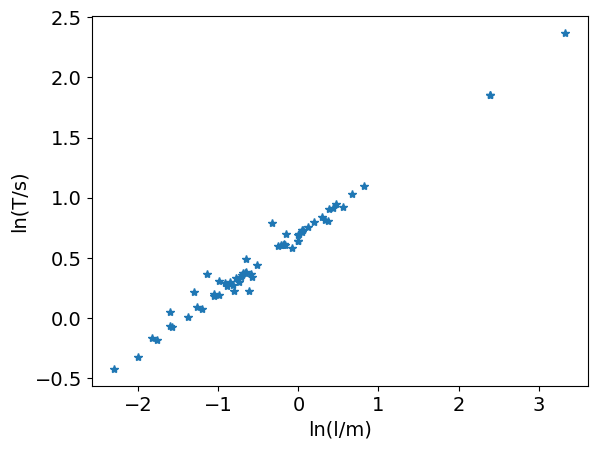

In [14]:
y = np.log(T)
x = np.log(l)

plt.plot(x,y, '*')
plt.xlabel('ln(l/m)')
plt.ylabel('ln(T/s)')

### Beräkna parametrarna A och B

Anpassa en rät linje ($y=A+Bx$) med minsta kvadratmetoden enligt ekvationerna:

$A = \frac{\sum x^2\sum y - \sum x\sum xy}{\Delta}$

$B = \frac{N\sum xy - \sum x\sum y}{\Delta}$

$\Delta = N \sum x^2 - \left(\sum x\right)^2$

Skriv ut resultatet.

In [15]:
class least_square:

    def __init__(self, x_data, y_data):
        self.x = np.array(x_data)
        self.y = np.array(y_data)
        self.A = 0
        self.B = 0
        self.delta = 0

    def delta_calc(self):
       self.delta = self.x.size*np.sum(self.x**2) - (np.sum(self.x))**2

    def A_calc(self):
        self.A = (np.sum(self.x**2)*np.sum(self.y) - np.sum(self.x)*np.sum(self.x*self.y))/self.delta

    def B_calc(self):
        self.B = (self.x.size*np.sum(self.x*self.y) - np.sum(self.x)*np.sum(self.y))/self.delta
    
    def linefit(self):
        self.delta_calc()
        self.A_calc()
        self.B_calc()
        print(f'A = {self.A}, B = {self.B}')
        return self.A, self.B


fitted_line = least_square(x, y)

A, B = fitted_line.linefit()

A = 0.7021053971296364, B = 0.4807016450579744


Gör en ny graf över mätdata (y som funktion av x) och rita in den anpassade linjen. För att göra det skapar du lämpligen en ny x-variabel:

`x_linje = np.arange(-2,1.5,0.01)`

och beräknar sedan motsvarande värden på `y_linje` enligt $y=A+Bx$.

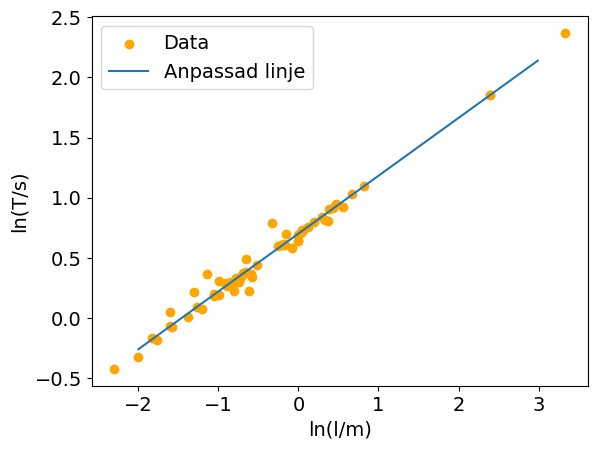

In [16]:
x_linje = np.arange(-2,3,0.01)

y_linje = A + B*x_linje

fig, ax =  plt.subplots()

ax.scatter(x, y, label='Data', color='orange')
ax.plot(x_linje, y_linje, label='Anpassad linje')
ax.set_xlabel('ln(l/m)')
ax.set_ylabel('ln(T/s)')
ax.legend()

Beräkna standardavvikelsen för datapunkternas spridning kring linjen enligt

$s_y = \sqrt{\sum\frac{(y_i-A-Bx)^2}{N-2}}$

In [17]:
s_y = np.sqrt((np.sum((y-A-B*x)**2)/(np.size(y)-2)))

print(f's_y = {s_y}')

s_y = 0.06560437105775171


Gör om grafen ovan och lägg till linjerna för $\pm s_y$. Om du vill kan du använda funktionen

`plt.fill_between(x,y_max, y_min, alpha=0.5)`

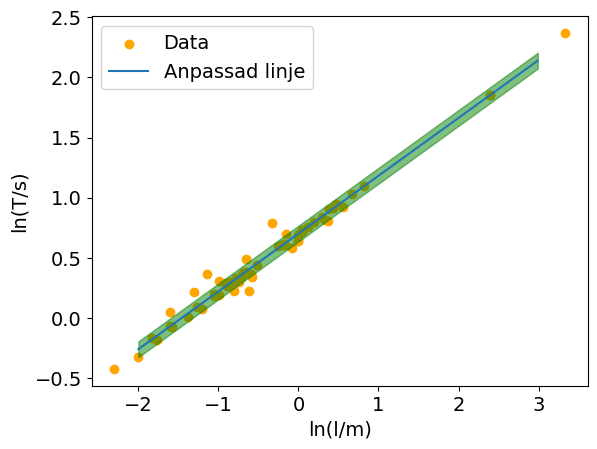

In [18]:
fig, ax =  plt.subplots()

ax.scatter(x,y, label='Data', color='orange')
ax.plot(x_linje, y_linje, label='Anpassad linje')
ax.fill_between(x_linje, y_linje+s_y, y_linje-s_y, alpha=0.5, color='green')
ax.set_xlabel('ln(l/m)')
ax.set_ylabel('ln(T/s)')
ax.legend()

Beräkna osäkerheterna i konstanterna $a$ och $b$ enligt:

$s_A = s_y\sqrt{\frac{\sum x^2}{\Delta}}$

$s_B = s_y\sqrt{\frac{N}{\Delta}}$

Skriv ut resultatet.

In [19]:
s_a = s_y*np.sqrt(np.sum(x**2)/fitted_line.delta)
s_b = s_y*np.sqrt(np.size(x)/fitted_line.delta)

In [20]:
print(f's_a = {s_a}')
print(f's_b = {s_b}')

s_a = 0.008945514321776213
s_b = 0.008416934637614785


### Använd anpassningen för att bestämma g

Enligt teorin för en matematisk pendel är:

$T = 2\pi\sqrt{\frac{l}{g}} = \frac{2\pi}{\sqrt{g}}\sqrt{l}$

Logaritmera detta uttryck och avgör om det anpassade värdet på $b$ stämmer med teorin.

$ \ln(T) = \ln(\frac{2\pi}{\sqrt{g}}) + 0,5\ln l$

Därmed bör b enligt teorin vara 0,5 och det beräknade värdet på 0.48 är mycket nära

Beräkna värdet på konstanten $g$ utifrån det anpassade värdet på $a$. Använd felfortplantningsformeln för att beräkna osäkerheten i $g$, $\delta g = s_g$.

$g= \frac{4\pi^2}{e^{2A}} = 9,69$

$s_g= -\frac{8\pi^2}{e^{2A}} \cdot s_a = 0,055$

### Frivillig extrauppgift

Använd värdena på $x$ och $y$ från den anpassade linjen (`x_linje` och `y_linje`) till att bestämma motsvarande värden på $T$ och $l$. Använd sedan felfortplantning för att bestämma punkternas standardavvikelse kring $T$-värdena ($s_T$) utifrån $s_y$. Gör sedan en graf över $T(l)$ som inkluderar både mätdata och den anpassade funktionen med standardavvikelse.

$l = $

$T = $

$s_T = $